# Assignment 2

## Exercise 1

In [ ]:
def example1(n):
    sum = 0  # O(1) - Initializing sum
    for i in range(1, n + 1):  # O(n) - Loop runs n times
        sum += i  # O(1) - Addition is a constant time operation
    return sum  # O(1) - Returning the sum
    # Overall Time Complexity: O(n)


def example2(n):
    p = 1  # O(1) - Initializing p
    for i in range(
        1, 2 * n + 1
    ):  # O(2n) - Loop runs 2n times (still O(n) in big-Oh notation)
        p *= i  # O(1) - Multiplication is a constant time operation
    return p  # O(1) - Returning the product
    # Overall Time Complexity: O(n)


def example3(n):
    p = 1  # O(1) - Initializing p
    for i in range(1, int(n**2) + 1):  # O(n^2) - Loop runs n^2 times
        p *= i  # O(1) - Multiplication is a constant time operation
    return p  # O(1) - Returning the product
    # Overall Time Complexity: O(n^2)


def example4(n):
    sum = 0  # O(1) - Initializing sum
    for i in range(
        1, 2 * n + 1
    ):  # O(2n) - Outer loop runs 2n times (still O(n) in big-Oh notation)
        for j in range(1, i + 1):  # O(i) - Inner loop runs i times
            sum += i  # O(1) - Addition is a constant time operation
    # Total time complexity for the nested loops is the sum of the series 1 + 2 + 3 + ... + 2n, which is O(n^2)
    return sum  # O(1) - Returning the sum
    # Overall Time Complexity: O(n^2)


def example5(n):
    sum = 0  # O(1) - Initializing sum
    for i in range(1, int(n**2) + 1):  # O(n^2) - Outer loop runs n^2 times
        for j in range(1, i + 1):  # O(i) - Inner loop runs i times
            sum += i  # O(1) - Addition is a constant time operation
    # Total time complexity for the nested loops is the sum of the series 1 + 2 + 3 + ... + n^2, which is O(n^4)
    return sum  # O(1) - Returning the sum
    # Overall Time Complexity: O(n^4)

## Exercise 2

In [ ]:
def unique1(S):
    for j in range(len(S)):
        for k in range(j + 1, len(S)):
            if S[j] == S[k]:
                return False
    return True


def unique2(S):
    temp = sorted(S)
    for j in range(1, len(temp)):
        if temp[j - 1] == temp[j]:
            return False
    return True


### measure_execution_time

In [ ]:
def measure_execution_time(func, input_size):
    S = list(range(input_size))
    start_time = time.time()
    func(S)
    end_time = time.time()
    return end_time - start_time

### find_max_input_size_within_time_limit

In [ ]:
import matplotlib.pyplot as plt
import time
import pandas as pd


def find_max_input_size_within_time_limit(func, time_limit=60):
    n = 1
    execution_times = {}

    while True:
        execution_time = measure_execution_time(func, n)
        execution_times[n] = execution_time
        if execution_time > time_limit:
            break
        n *= 2

    low, high = n // 2, n
    while low < high:
        mid = (low + high) // 2
        execution_time = measure_execution_time(func, mid)
        execution_times[mid] = execution_time
        if execution_time <= time_limit:
            low = mid + 1
        else:
            high = mid

    return execution_times

### plot_execution_times

In [ ]:
def plot_execution_times(execution_times1, execution_times2, time_limit):
    df1 = pd.DataFrame(
        list(execution_times1.items()), columns=["Input Size (n)", "Execution Time (s)"]
    )
    df1["Input Size (n)"] = df1["Input Size (n)"].astype("category")

    df2 = pd.DataFrame(
        list(execution_times2.items()), columns=["Input Size (n)", "Execution Time (s)"]
    )
    df2["Input Size (n)"] = df2["Input Size (n)"].astype("category")

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    axs[0].bar(
        df1["Input Size (n)"].astype(str), df1["Execution Time (s)"], color="blue"
    )
    axs[0].axhline(
        y=time_limit, color="red", linestyle="--", label=f"Time Limit = {time_limit}s"
    )
    axs[0].set_xlabel("Input Size per Iteration")
    axs[0].set_ylabel("Execution Time (s)")
    axs[0].set_title("Execution Time vs. Input Size per Iteration for unique1")
    axs[0].legend()
    axs[0].tick_params(axis="x", rotation=90)

    axs[1].bar(
        df2["Input Size (n)"].astype(str), df2["Execution Time (s)"], color="green"
    )
    axs[1].axhline(
        y=time_limit, color="red", linestyle="--", label=f"Time Limit = {time_limit}s"
    )
    axs[1].set_xlabel("Input Size per Iteration")
    axs[1].set_ylabel("Execution Time (s)")
    axs[1].set_title("Execution Time vs. Input Size per Iteration for unique2")
    axs[1].legend()
    axs[1].tick_params(axis="x", rotation=90)

    plt.tight_layout()
    plt.show()

### Main

The largest value of n such that the given algorithm runs in 0.1 second(s) or less is approximately 3200.
The largest value of n such that the given algorithm runs in 0.1 second(s) or less is approximately 2903100.


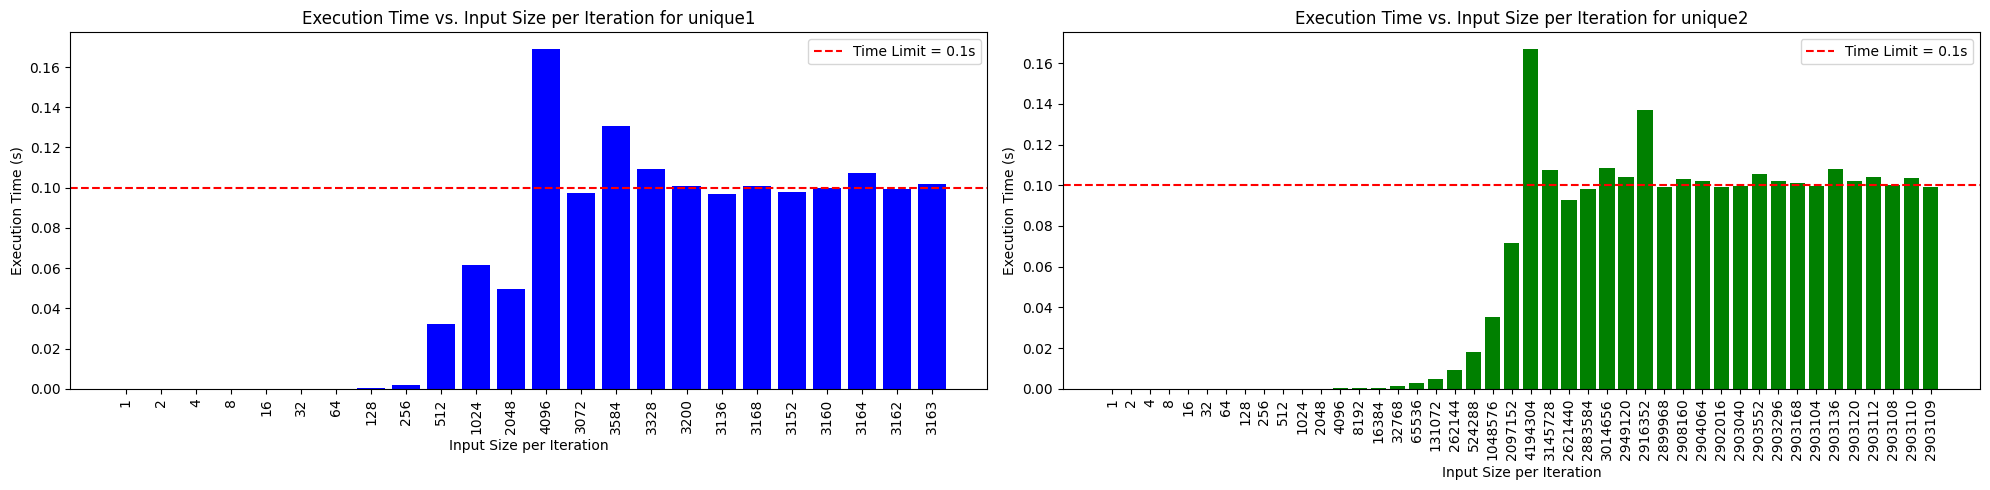

In [ ]:
limit = 0.1
execution_times1 = find_max_input_size_within_time_limit(unique1, time_limit=limit)
print(
    f"The largest value of n such that the given algorithm runs in {limit} second(s) or less is approximately {round(list(execution_times1)[-1], -2)}."
)


execution_times2 = find_max_input_size_within_time_limit(unique2, time_limit=limit)
print(
    f"The largest value of n such that the given algorithm runs in {limit} second(s) or less is approximately {round(list(execution_times2)[-1], -2)}."
)

plot_execution_times(execution_times1, execution_times2, time_limit=limit)


## Exercise 3

In [ ]:
def find_non_sum_integer(A):
    if len(A) < 2:
        return None
    max_element = max(A)
    return 2 * max_element + 1


list1 = []
print(find_non_sum_integer(list1))

list2 = [0]
print(find_non_sum_integer(list2))

list3 = [0, 3, 1, 4, 12, 5, 2]
print(find_non_sum_integer(list3))

None
None
25
